In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [14]:
def read_results(file="trade_logs/results_trades.log"):
    with open(file,"r") as f:
        data = f.readlines()
    split_data = [d[:-1].split(",") for d in data]
    opens=[]
    closes=[]
    for ticker,interval,openprice,closeprice,dfname,starttime,exittime,reason in split_data:
        opens.append(float(openprice.split("open")[-1]))
        closes.append(float(closeprice.split("closeprice")[-1]))
    profits = (np.asarray(closes)-np.asarray(opens))/np.asarray(opens)
    startingfund=1
    endingfund = startingfund
    equity = [startingfund]
    for p in profits:
        endingfund *= (1+p)
        equity.append(endingfund)
    return equity,profits

In [17]:
equity,profits = read_results(file="trade_logs/results_trades.log")

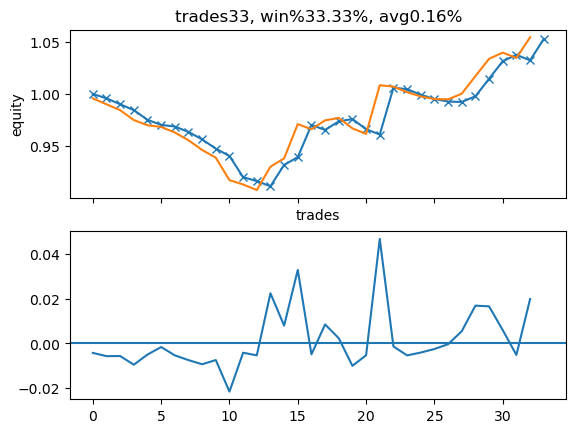

In [18]:
fig,axx = plt.subplots(2,1,sharex=True)
ax=axx[0]
ax.plot(equity,marker="x")
ax.plot(np.cumsum([0]+profits)+1)
ax.set_xlabel("trades")
ax.set_ylabel("equity")
ax.set_title(f"trades{len(profits)}, win%{sum(profits>0)/len(profits)*100:.2f}%, avg{(np.mean(profits))*100:.2f}%")
ax=axx[1]
ax.plot(profits)
ax.axhline(0)

In [15]:
equity,profits = read_results(file="trade_logs/results_trades2.log")

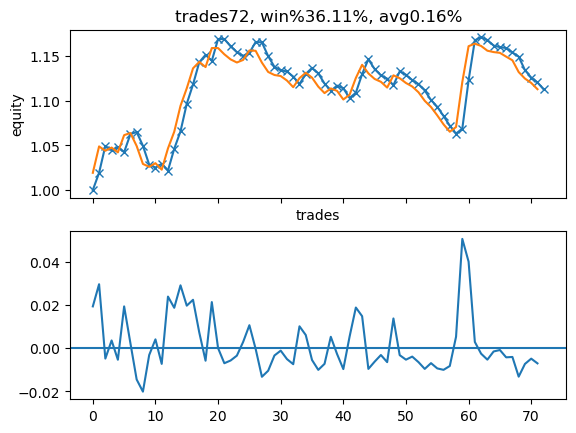

In [16]:
fig,axx = plt.subplots(2,1,sharex=True)
ax=axx[0]
ax.plot(equity,marker="x")
ax.plot(np.cumsum([0]+profits)+1)
ax.set_xlabel("trades")
ax.set_ylabel("equity")
ax.set_title(f"trades{len(profits)}, win%{sum(profits>0)/len(profits)*100:.2f}%, avg{(np.mean(profits))*100:.2f}%")
ax=axx[1]
ax.plot(profits)
ax.axhline(0)